In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [13]:
import sklearn.datasets

In [44]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
#X=imagenes
Y = numeros['target']
print(np.shape(X), np.shape(Y))
print(Y[:10])

(1797, 64) (1797,)
[0 1 2 3 4 5 6 7 8 9]


In [45]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [63]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = (scaler.transform(X_test))
#conversion to pytorch tensor and adding a 1 dimension with unsqueeze
X_train_t = torch.from_numpy(X_train.reshape((len(X_train), 8, 8))).unsqueeze(1)
X_test_t = torch.from_numpy(X_test.reshape((len(X_test), 8, 8))).unsqueeze(1)

In [67]:
print(np.shape(X_train_t[0]))
print(X_train_t.size())

torch.Size([1, 8, 8])
torch.Size([898, 1, 8, 8])


(898, 64)


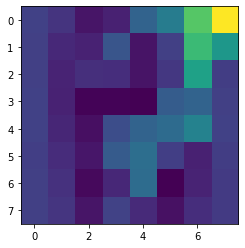

In [68]:
print(np.shape(X_train))
plt.imshow(X_train.reshape((898, 8, 8))[0])

In [106]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        #input1, out:15
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 15, kernel_size=8, stride=1),
            torch.nn.ReLU(True),
            # out:15, out7
            torch.nn.Conv2d(15,1,kernel_size=1),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(1,15,kernel_size=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(15,1,kernel_size=8, stride=1),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
auto = Autoencoder()
print(auto)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 15, kernel_size=(8, 8), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(15, 1, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(1, 15, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(15, 1, kernel_size=(8, 8), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)


In [107]:
# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [108]:
# entrenamiento
for epoch in range(num_epochs):
    output = model(X_train_t.float())
    loss = distance(output, X_train_t.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/100], loss:0.9496
epoch [2/100], loss:0.9458
epoch [3/100], loss:0.9428
epoch [4/100], loss:0.9404
epoch [5/100], loss:0.9386
epoch [6/100], loss:0.9376
epoch [7/100], loss:0.9369
epoch [8/100], loss:0.9362
epoch [9/100], loss:0.9355
epoch [10/100], loss:0.9341
epoch [11/100], loss:0.9322
epoch [12/100], loss:0.9297
epoch [13/100], loss:0.9269
epoch [14/100], loss:0.9236
epoch [15/100], loss:0.9199
epoch [16/100], loss:0.9158
epoch [17/100], loss:0.9115
epoch [18/100], loss:0.9075
epoch [19/100], loss:0.9046
epoch [20/100], loss:0.9029
epoch [21/100], loss:0.9022
epoch [22/100], loss:0.9013
epoch [23/100], loss:0.8995
epoch [24/100], loss:0.8972
epoch [25/100], loss:0.8953
epoch [26/100], loss:0.8943
epoch [27/100], loss:0.8940
epoch [28/100], loss:0.8939
epoch [29/100], loss:0.8935
epoch [30/100], loss:0.8927
epoch [31/100], loss:0.8919
epoch [32/100], loss:0.8912
epoch [33/100], loss:0.8907
epoch [34/100], loss:0.8902
epoch [35/100], loss:0.8896
epoch [36/100], loss:0.8888
e

In [114]:
x_transform = model(X_train_t.float())
latent_space = model.encoder(X_train_t.float())
print(x_transform.size())
print(latent_space.size())

torch.Size([898, 1, 8, 8])
torch.Size([898, 1, 1, 1])


IndexError: index 2 is out of bounds for dimension 0 with size 1

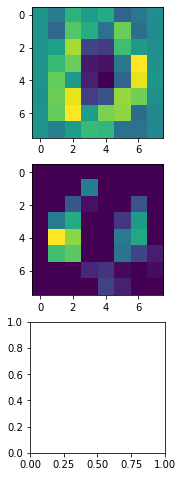

In [113]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 16
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(X_train_t[i+offset][0].detach().numpy())
    #plt.title(train_loader.dataset.classes[train_loader.dataset.targets[i+offset]] )
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())
